In [1]:
import copy,math
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston # Our boston house pricing dataset 
import matplotlib.pyplot as plt

In [2]:
df = load_boston()
df

C:\Users\tanma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
dataset = pd.DataFrame(df.data)

In [4]:
x_train = dataset.to_numpy()

In [5]:
x_train

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
x_train.shape

(506, 13)

In [7]:
y_train = df.target

In [8]:
y_train

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [108]:
y_train.shape

(506,)

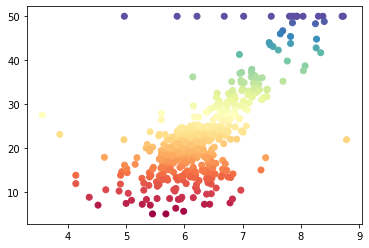

In [109]:
plt.scatter(x_train[:,5],y_train,c=y_train,cmap='Spectral')

In [11]:
w_train = np.ones((13))
b_train = 0

In [12]:
w_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
def cost(x_train,y_train,w_train,b_train):
    m = x_train.shape[0]
    J = 0.0
    for i in range(m):
        err  = (np.dot(w_train,x_train[i])+b_train-y_train[i])**2
        J = J + err
    J = J/(2*m)
    return J

In [10]:
def gradient(x_train,y_train,w_train,b_train):
    m,n = x_train.shape
    dj_dw= np.zeros(n)
    dj_db=0
    for i in range(m):
        err  = np.dot(x_train[i],w_train)+b_train-y_train[i]
        dj_dw = dj_dw+err*x_train[i]
        dj_db = dj_db+(err)
    return dj_dw/m,dj_db/m

In [11]:
def gradient_descent(x_train,y_train,w_train,b_train,iters, alpha):
    m = x_train.shape[0]
    w = w_train
    b = b_train
    for i in range(iters):
        dj_dw,dj_db = gradient(x_train,y_train,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        if i%1000==0:
            print("After ",i," Iterations"," w =",w," b =",b," cost is",cost(x_train,y_train,w,b))
    return w,b

In [71]:
b_train = 0
w_train = np.zeros(13)
w,b=gradient_descent(x_train,y_train,w_train,b_train,45000,alpha = 5.0e-7)

After  0  Iterations  w = [2.53825135e-05 1.66608498e-04 1.10241186e-04 9.83596838e-07
 6.02216197e-06 7.30475075e-05 7.23894407e-04 4.51718124e-05
 9.23370553e-05 4.23695415e-03 2.02882144e-04 4.15815168e-03
 1.18378616e-04]  b = 1.1266403162055349e-05  cost is 229.88482793592405
After  1000  Iterations  w = [-5.33442625e-03  2.95592852e-02 -3.88717168e-03  2.05005249e-04
  1.33910945e-04  4.77429930e-03  2.46760600e-03  2.39351783e-03
 -1.45879913e-03 -5.31898821e-05  4.16031181e-03  6.02784912e-02
 -1.16610029e-02]  b = 0.00044316350433285635  cost is 38.92644950208558
After  2000  Iterations  w = [-0.00935481  0.0496374  -0.00697624  0.00040161  0.00023646  0.00868744
  0.0045539   0.00369796 -0.00164697  0.00060098  0.00657978  0.05886186
 -0.022906  ]  b = 0.0007681156965359229  cost is 37.75104091780469
After  3000  Iterations  w = [-0.01323847  0.06532615 -0.00963866  0.00059961  0.00034263  0.01250912
  0.00828149  0.00476362 -0.0017508   0.00093627  0.00900461  0.05760387
 -0

After  34000  Iterations  w = [-0.08906141  0.13015181 -0.05286245  0.00636468  0.00348082  0.11398674
  0.07722948  0.01746288  0.00979527  0.0026725   0.07799865  0.04631946
 -0.30013127]  b = 0.009643509034020519  cost is 29.39429242679982
After  35000  Iterations  w = [-0.09042275  0.12997754 -0.05380943  0.00654024  0.00357984  0.1170117
  0.07805368  0.01775815  0.01025792  0.00275028  0.08013539  0.04618455
 -0.30695653]  b = 0.009906477158776645  cost is 29.265900701508148
After  36000  Iterations  w = [-0.09173441  0.12979586 -0.05473697  0.00671533  0.0036789   0.12002674
  0.07885683  0.01805156  0.01071872  0.00282605  0.08226882  0.04605207
 -0.31368474]  b = 0.010169115677872443  cost is 29.14069794501144
After  37000  Iterations  w = [-0.09299779  0.12960822 -0.05564537  0.00688995  0.00377801  0.12303202
  0.07964024  0.01834313  0.01117754  0.00289977  0.08439887  0.04592183
 -0.32031728]  b = 0.010431429115487795  cost is 29.01858302031173
After  38000  Iterations  w 

In [12]:
def predict(x,w,b):
    f_wb_x = np.dot(x,w)+b
    return f_wb_x

In [72]:
# The above implementaion was without any other feature.
p = predict(x_train[367],w,b)
p

12.293395868239509

In [13]:
# Lets try normalisation of data:
def Mean_normalisation(X):
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma   
   
    return X_norm,mu,sigma                                                     
    

In [65]:
x,mi,sigma = Mean_normalisation(x_train)

In [66]:
x.shape

(506, 13)

In [76]:
b_train = 0
w_train = np.zeros(13)
w,b=gradient_descent(x,y_train,w_train,b_train,45000,alpha = .09)

After  0  Iterations  w = [-0.32109725  0.29805984 -0.40000251  0.14492633 -0.35336054  0.57500777
 -0.31171166  0.20667133 -0.31557476 -0.38744222 -0.41989949  0.27574577
 -0.60998883]  b = 2.0279525691699627  cost is 236.93371479594748
After  1000  Iterations  w = [-0.92764588  1.08068788  0.13816733  0.68213068 -2.05624289  2.6747262
  0.01904639 -3.10424311  2.65532293 -2.06894309 -2.06035188  0.84921987
 -3.7433612 ]  b = 22.532806324110663  cost is 10.947419352279816
After  2000  Iterations  w = [-0.92814444  1.08156577  0.14089114  0.68174099 -2.05671673  2.67423177
  0.01946471 -3.1040449   2.6621953  -2.07675629 -2.06060583  0.84926826
 -3.74362626]  b = 22.532806324110663  cost is 10.94741559090408
After  3000  Iterations  w = [-0.92814606  1.08156862  0.14089997  0.68173973 -2.05671826  2.67423017
  0.01946607 -3.10404426  2.66221757 -2.0767816  -2.06060666  0.84926842
 -3.74362712]  b = 22.532806324110663  cost is 10.947415590864606
After  4000  Iterations  w = [-0.92814606

KeyboardInterrupt: 

In [75]:

p = predict(x[367],w,b)
print(p)

-0.6974129220974784


In [70]:
y_train[367] #After normalisation we have out data to be having less than 50% 

23.1

In [183]:
# We have tried normalisation for data of x lets now try feature engineering with terms of x^2 as well

In [28]:
x_train_1 = np.concatenate((x_train,x_train**2),axis=1)

In [29]:
x_train_1.shape # as you can see we have changed the shape

(506, 26)

In [117]:
# lets see a scatter plot with the 14the feature

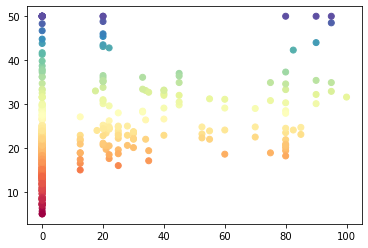

In [118]:
plt.scatter(x_train_1[:,1],y_train,c = y_train, cmap="Spectral")

In [32]:
# Lets normalise our data:
x,mu,sigma = Mean_normalisation(x_train_1)
print(x.shape)

(506, 26)


In [33]:
# lets run gradient descent for the same
b_train = 0
m,n = x.shape
w = np.zeros(n)
w,b_train = gradient_descent(x[:367],y_train[:367],w,b_train,15000,alpha = 0.1)

After  0  Iterations  w = [-0.91337841  0.75620707 -1.182221    0.22839367 -1.01198751  1.06971694
 -0.86745864  0.80379466 -1.29934132 -1.40200705 -1.12755307  0.71395566
 -1.24318047 -0.41741993  0.62513551 -1.06079194  0.22839367 -0.95395327
  1.09625196 -0.89385255  0.650809   -1.32401707 -1.40918263 -1.14052629
  0.72177409 -1.05246698]  b = 2.4924250681198945  cost is 147.29882798347353
After  1000  Iterations  w = [-2.95515306 -1.11065311 -0.91632284  0.02120771 -0.06621745 -2.71666834
 -0.75047619 -3.70798647  2.49320052 -2.36030697 -1.79253337  1.9128453
 -6.00701735 -3.34402981  1.34281997  0.99182165  0.02120771 -1.09484978
  7.04723562  0.11483379  1.6231002   1.23883794 -0.13521619  0.14061796
 -0.9926342   4.36426798]  b = 22.19765591490469  cost is 4.804695407425794
After  2000  Iterations  w = [-1.43941396 -1.02639106 -0.80253072  0.03099281  0.08763349 -5.47680253
 -0.52107222 -4.17153542  2.47801889 -2.85739737 -2.76037398  2.10360427
 -6.73668379 -3.29817138  1.22359

In [34]:
p = predict(x[367:],w,b_train)

In [35]:
p

array([21.26051942, 25.25492418, 31.0794853 , 34.56404748, 25.85168155,
       24.46853764, 20.96194763, 25.29557455, 33.16971984, 25.12289884,
       24.73489632, 25.30393329, 23.50199982, 12.69842401, 24.63658745,
       17.95896333, 17.59064753, 20.79574784, 20.60046192, 21.2587067 ,
       21.87916528, 19.2659824 , 17.370573  , 18.17428197, 18.29051431,
       17.85915845, 21.53055053, 21.31386034, 22.24501871, 20.59624975,
       18.4051589 , 22.80059287, 20.01962233, 23.02918405, 22.75152088,
       21.49845193, 21.54334357, 21.97018203, 16.06256297, 22.34858632,
       22.35522607, 18.9909005 , 25.61144125, 21.99779371, 21.84342407,
       19.19807182, 21.65202023, 20.47597928, 19.75741176, 19.80617805,
       19.06713578,  9.94238516, 20.55194602, 22.05426274, 18.80426827,
       21.44905755, 15.57230956, 16.16301756, 16.1981253 , 19.10776184,
       22.12953287, 16.93292852, 17.26206522, 19.73672266, 22.35922063,
       21.67736862, 17.20465811, 18.96042534, 18.68054339, 18.23

In [148]:
# As you can usng feature engineering and normalisation our data has improved many many times.
# The model accuracy using sklearn was 73% using linear regression where as with our method it has come out to be 83%

In [150]:
x_train_1 = np.concatenate((x_train,x_train**2,x_train**3),axis=1)

In [151]:
x_train_1.shape

(506, 39)

In [152]:
x,mu,sigma = Mean_normalisation(x_train_1)

In [153]:
x.shape

(506, 39)

In [154]:
b_train = 0
m,n = x.shape
w = np.zeros(n)
w,b_train = gradient_descent(x,y_train,w,b_train,15000,alpha = 0.1)

After  0  Iterations  w = [-0.35677472  0.3311776  -0.44444724  0.16102925 -0.39262282  0.63889752
 -0.34634629  0.22963481 -0.35063862 -0.43049136 -0.46655499  0.30638419
 -0.67776536 -0.20106807  0.28905616 -0.39406675  0.16102925 -0.38303796
  0.65985473 -0.35967923  0.1799646  -0.35902911 -0.41993546 -0.46919301
  0.30866238 -0.57165857 -0.13750944  0.27069319 -0.34544816  0.16102925
 -0.36721293  0.67095417 -0.36284059  0.13502445 -0.36216265 -0.40945925
 -0.47032627  0.30375241 -0.47126752]  b = 2.25328063241107  cost is 230.359206630353
After  1000  Iterations  w = [-2.54190404 -0.30741314 -1.26318311  0.22676362 -0.42552681 -5.36930844
 -0.6072485  -3.68635039  2.84216611 -1.70720863 -2.39641681  1.66363126
 -7.25637966  0.63874944 -0.99195601  0.72566277  0.22676362 -0.86555591
  1.10479341 -0.39042156  0.30291722  0.46755157 -0.45095261 -0.52297308
  0.25778688  0.52349335  0.39265774  1.56377073  0.59216897  0.22676362
 -0.84302887  6.81069941  1.13372507  0.99898343  0.0657

In [155]:
p = predict(x,w,b_train)

In [156]:
p

array([29.14979344, 22.62781164, 31.87883317, 33.06622771, 30.45345012,
       27.5837429 , 20.28911562, 16.7878247 , 14.03938009, 16.77023239,
       16.47481864, 19.02565161, 18.76629073, 19.85192237, 18.64221442,
       19.90471098, 22.27082692, 15.39300776, 18.90494318, 18.16927936,
       13.24486318, 16.19399691, 13.82235668, 13.25039212, 14.34811871,
       14.37045609, 14.86850804, 14.3866802 , 17.6810729 , 18.9830559 ,
       12.28939145, 16.92857621, 11.38745989, 14.37421887, 13.91565526,
       23.02045896, 21.81469885, 23.2718778 , 22.408207  , 28.85171984,
       33.8634681 , 28.91837257, 26.13050519, 24.20719223, 22.39925979,
       21.93457626, 19.10276688, 15.93605231, 13.03304521, 16.4630857 ,
       19.5159668 , 22.61387295, 28.42659891, 23.77443399, 12.44982102,
       34.3177238 , 25.75677337, 38.19611525, 24.07701275, 21.54927378,
       17.72999291, 17.70967682, 24.63967481, 22.99482635, 26.68542541,
       28.48379326, 21.88325311, 21.89402019, 17.49555246, 21.20

In [157]:
print(r2_score(y_train,p)*100)

83.87776751686673
